# 2020.11.17

# 인공지능 강의 7일차


===============================================================

비지도 학습 : 트랜드 학습, k-means 알고리즘

지도학습
분류 : 카테고리 분류
회귀 : 정확한 수치 값 예측

비지도학습
분류 : 군집화, Clustering

최근접 이웃(k-NNN)
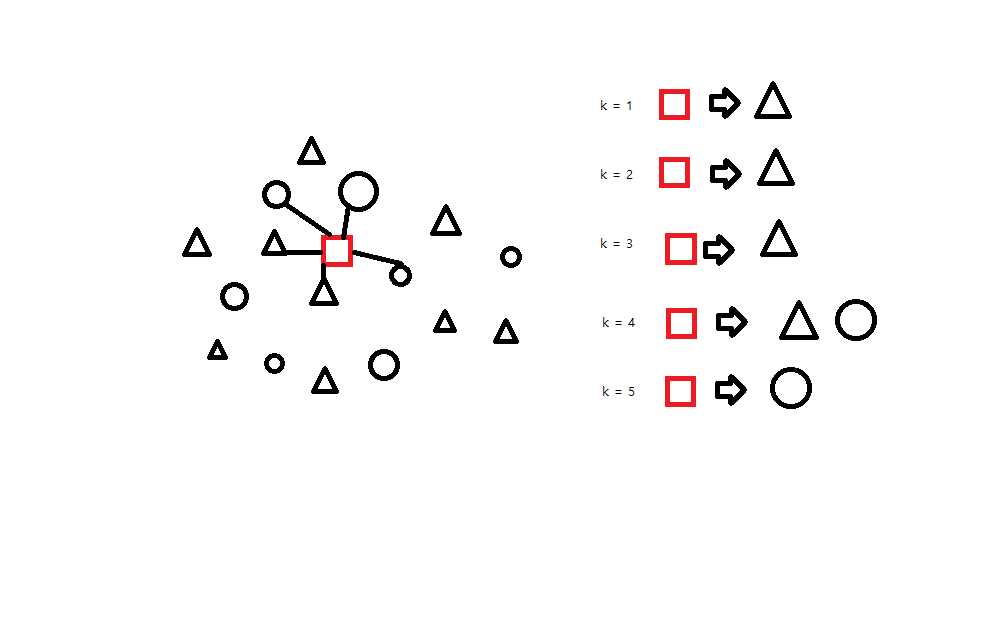

### 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
import pandas as pd

# 품종을 미리 나타내 주자
v = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Load Data
iris = load_iris()

# feature만으로 된 데이터
iris_data = iris.data
print(type(iris.data))
# 품종, target, label
iris_label = iris.target
# print('iris target명:', iris.target_names)
print('iris label명:', {idx:i for idx, i in enumerate(iris.target_names)})
# print('iris target값:', iris_label)


# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)


<class 'numpy.ndarray'>
iris label명: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [13]:
print("x is feature. y is label or target")
# if test_size = 0.2 is train_size = 0.8
# train_test_split(feature 데이터, label 데이터, test_size=테스트할 사이즈, random_state=난수 씨앗) 함수를 이용하여 분리
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

x is feature. y is label or target


관련 설명이 잘되어 있다.
https://roboreport.co.kr/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5-%ED%9B%88%EB%A0%A8-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EA%B5%AC%EC%84%B1-%EB%B0%A9%EB%B2%95/

===============================================================

## Supervised Machine Learning
### Training Data & Test Data
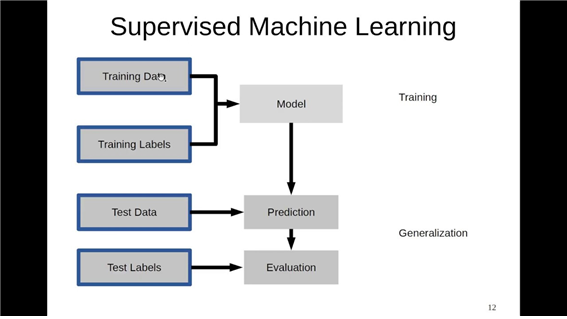

### Decision Tree

===============================================================

In [14]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 train 값을 넣어야 한다.
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

In [15]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
pred = dt_clf.predict(x_test)
# print(pred)

x_test2 = [[2.3, 4.5, 1.6, 2.3]]
pred1 = dt_clf.predict(x_test2)
print(v[pred1[0]])

versicolor


In [16]:
from sklearn.metrics import accuracy_score

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


===============================================================
### SVM
### : 2차원에서 해결되지 않는 것을 커널함수를 이용해서 3차원으로 만든 후 분리 한다.
#### 2차원
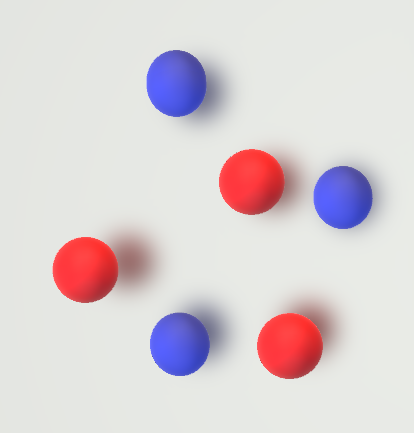
#### 3차원
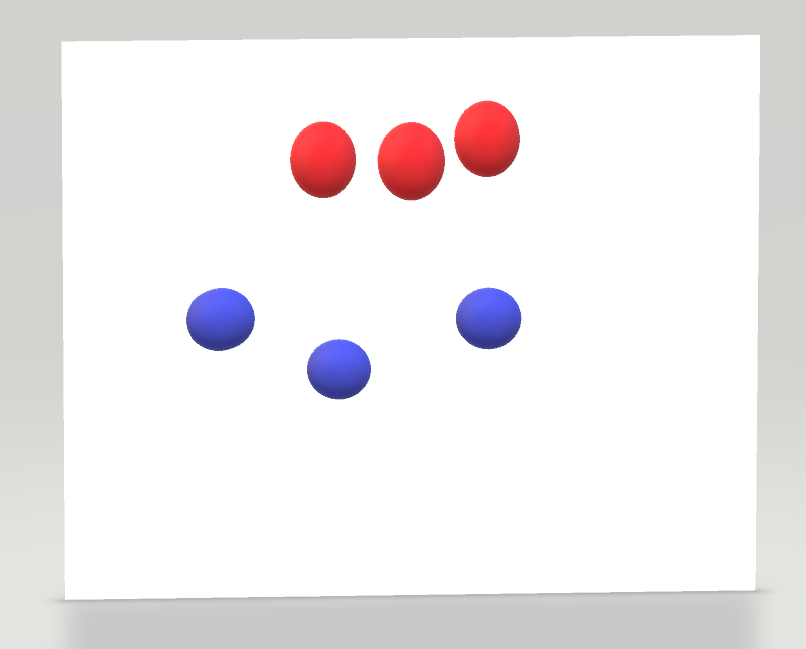

In [17]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [18]:
pred = svm_clf.predict(x_test)
print(pred)

x_test2 = [[2.3, 4.5, 1.6, 2.3]]
pred1 = svm_clf.predict(x_test2)
print(v[pred1[0]])

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
setosa


In [19]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


===============================================================
### 머신러닝(지도학습) Practice 2

#### < Part1 >=========================================================

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [21]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [22]:
print('titanic features ---------------------------------------')
titanic_features = titanic_df[['Pclass', 'Sex', 'Parch']]
print(titanic_features.head(3))

print('---------------------------------------')
print('titanic label ---------------------------------------')

titanic_label = titanic_df['Survived']
print(titanic_label.head(3))

titanic features ---------------------------------------
   Pclass     Sex  Parch
0       3    male      0
1       1  female      0
2       3  female      0
---------------------------------------
titanic label ---------------------------------------
0    0
1    1
2    1
Name: Survived, dtype: int64


#### < Part2 >=========================================================

In [23]:
# ti_x_train, ti_x_test, ti_y_train, ti_y_test = train_test_split(titanic_features, titanic_label, test_size=0.2, random_state=11)

In [24]:
# dt_clf.fit(ti_x_train, ti_y_train)
# ti_pred = dt_clf.predict(ti_x_test)
# print(ti_pred)

In [25]:
titanic_features['Sex'] = titanic_df['Sex'].map({'female':1, 'male':0}).astype(int)
print(titanic_features.head(3))

   Pclass  Sex  Parch
0       3    0      0
1       1    1      0
2       3    1      0


<ipython-input-25-002cf5aec515>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_features['Sex'] = titanic_df['Sex'].map({'female':1, 'male':0}).astype(int)


In [26]:
ti_x_train, ti_x_test, ti_y_train, ti_y_test = train_test_split(titanic_features, titanic_label, test_size=0.2, random_state=11)
dt_clf.fit(ti_x_train, ti_y_train)
ti_pred = dt_clf.predict(ti_x_test)
print(ti_pred)
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(ti_y_test, ti_pred)))

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0]
예측 정확도: 0.8380


In [27]:
titanic_features['SibSp'] = titanic_df['SibSp']

ti_x_train, ti_x_test, ti_y_train, ti_y_test = train_test_split(titanic_features, titanic_label, test_size=0.2, random_state=11)

dt_clf.fit(ti_x_train, ti_y_train)
ti_pred = dt_clf.predict(ti_x_test)
# print(ti_pred)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(ti_y_test, ti_pred)))

예측 정확도: 0.8045


<ipython-input-27-f6d17e480b99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_features['SibSp'] = titanic_df['SibSp']


#### < Part3 >=========================================================

In [28]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
# print(titanic_df.info())

titanic_features['Age'] = titanic_df['Age']

ti_x_train, ti_x_test, ti_y_train, ti_y_test = train_test_split(titanic_features, titanic_label, test_size=0.2, random_state=11)

dt_clf.fit(ti_x_train, ti_y_train)
ti_pred = dt_clf.predict(ti_x_test)
# print(ti_pred)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(ti_y_test, ti_pred)))

예측 정확도: 0.8156


<ipython-input-28-a86cc72a878a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_features['Age'] = titanic_df['Age']


In [29]:
def get_category(age):
    if age <= -1: return 0
    elif age <= 5: return 1
    elif age <= 12: return 2
    elif age <= 18: return 3
    elif age <= 25: return 4
    elif age <= 35: return 5
    elif age <= 60: return 6
    else : return 7
    
# titanic_features['Age_cat'] = titanic_features['Age'].apply(lambda x: get_category(x))
# titanic_features = titanic_features.drop(['Age'], axis=1)

print(titanic_features.head(3))

ti_x_train, ti_x_test, ti_y_train, ti_y_test = train_test_split(titanic_features, titanic_label, test_size=0.2, random_state=11)

dt_clf.fit(ti_x_train, ti_y_train)
ti_pred = dt_clf.predict(ti_x_test)
print(ti_pred)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(ti_y_test, ti_pred)))

   Pclass  Sex  Parch  SibSp   Age
0       3    0      0      1  22.0
1       1    1      0      1  38.0
2       3    1      0      0  26.0
[1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1]
예측 정확도: 0.8156


In [30]:
# titanic_df['Fare'].describe()
titanic_features['Fare_cat'] = titanic_df['Fare'].apply(lambda x: 0 if x < 8 else(1 if x< 14 else(2 if x<=31 else 3)))
print(titanic_features.head(3))

ti_x_train, ti_x_test, ti_y_train, ti_y_test = train_test_split(titanic_features, titanic_label, test_size=0.2, random_state=11)

dt_clf.fit(ti_x_train, ti_y_train)
ti_pred = dt_clf.predict(ti_x_test)
print(ti_pred)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(ti_y_test, ti_pred)))

   Pclass  Sex  Parch  SibSp   Age  Fare_cat
0       3    0      0      1  22.0         0
1       1    1      0      1  38.0         3
2       3    1      0      0  26.0         0
[1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1]
예측 정확도: 0.8547


<ipython-input-30-77852900c9c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_features['Fare_cat'] = titanic_df['Fare'].apply(lambda x: 0 if x < 8 else(1 if x< 14 else(2 if x<=31 else 3)))


In [31]:
ti_x_test2 = [[3, 1, 0, 0, 5, 0]]
ti_pred1 = dt_clf.predict(ti_x_test2)
print("Survived" if ti_pred1[0] == 1 else "Not Survived")

Not Survived


### 의사결정트리 ppt